In [45]:
#!pip install lmfit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit

In [46]:
data =pd.read_csv("C:/MLCourse/table.csv",sep=',')
data

,Timestamp,Country_Region,continent,Last_Update,Confirmed,Deaths
0,0,Afghanistan,Asia,2020-01-22 00:00:00,0,0
1,1,Afghanistan,Asia,2020-01-23 00:00:00,0,0
2,2,Afghanistan,Asia,2020-01-24 00:00:00,0,0
3,3,Afghanistan,Asia,2020-01-25 00:00:00,0,0
4,4,Afghanistan,Asia,2020-01-26 00:00:00,0,0
5,5,Afghanistan,Asia,2020-01-27 00:00:00,0,0
6,6,Afghanistan,Asia,2020-01-28 00:00:00,0,0
7,7,Afghanistan,Asia,2020-01-29 00:00:00,0,0
8,8,Afghanistan,Asia,2020-01-30 00:00:00,0,0
9,9,Afghanistan,Asia,2020-01-31 00:00:00,0,0


In [53]:
def COVID_Spread_Prediction(predicted_days, Country_Region):    
    cmd = data[data["Country_Region"]==Country_Region].iloc[: , [0, 2, 3 ,4, 5]].copy() 
    cmd_grp = cmd.groupby("Last_Update")[['Confirmed', 'Deaths']].sum().reset_index()
    y = cmd_grp["Confirmed"]
    x = np.arange(len(y))

    def power(x, a, b, c):
        return b*(x)**a + c
        
    def exp(x, a, b, c):
        return a * np.exp(-b * x) + c
    
    def sigmoid(x, a, b, c, d):
        return c / (1 + np.exp(-b*(x-a)))+d

    def logis(x,a,b,c):
        return c/(1+a*np.exp(-b*x))
    p0=np.random.exponential(size=3)
    p0
    bounds_log=(0,[100000.,3.,1000000000.])
    popt_pow, pcov_pow = curve_fit(power, x, y,maxfev=100000)
    popt_exp, pcov_exp = curve_fit(exp, x, y, p0=(1, 1e-6, 1), maxfev=100000)
    popt_sig, pcov_sig = curve_fit(sigmoid,x, y, method='dogbox', bounds=([10., 0.001, y.mean(), 10],[100, 1., 10*y.mean(), 100]), maxfev=200000)
    popt_log, pcov_log = curve_fit(logis,x,y,bounds=bounds_log,p0=p0)
    
    # Real Data
    plt.figure(figsize=(18,12))
    x1 = np.arange(len(y)+predicted_days)
    y = y.values
    plt.plot(x, y, c='b', marker="o", label = "Real Data")
    plt.text(x[-1]-2.5, y[-1], str(int(y[-1])), size = 15, color="b")
    
    #Logistic Growth Model
    y1 = logis(x1, *popt_log)
    plt.plot(x1, y1, c='g', marker="*", label="Best Case - Logistic Model") 
    plt.text(x1[-1]+.5, y1[-1], str(int(y1[-1])), size = 15, color="g")
    
    #Exponential Growth Model
    y1 = exp(x1, *popt_exp)
    plt.plot(x1, y1, c='r', marker="p", label="Worst Case - Exponential") 
    plt.text(x1[-1]+.5, y1[-1], str(int(y1[-1])), size = 15, color="r")
    
    #Power Law Model
    y1 = power(x1, *popt_pow)
    plt.plot(x1, y1, c='y', marker="s", label="Average case - Power") 
    plt.text(x1[-1]+.5, y1[-1], str(int(y1[-1])), size = 15, color="y")
    #Sigmoid Function Model     
    y1 = sigmoid(x1, *popt_sig)
    plt.plot(x1, y1, c='k', marker="x", label="Best Case - Sigmoid") 
    plt.text(x1[-1]+.5, y1[-1], str(int(y1[-1])), size = 15, color="k")
    plt.xlabel("Days", size=15)
    plt.xticks(np.arange(1,len(x1),2),size=15)
    plt.ylabel("Count of Infected", size=15)
    plt.yticks(size=15)
    plt.legend(prop={'size': 15})
    plt.title(Country_Region, size=15)
    plt.show()
    
#from lmfit.models import ParabolicModel
#qmodel = ParabolicModel()
#result = qmodel.fit(y, x=x, a=1, b=2, c=0)
#print(result.fit_report())

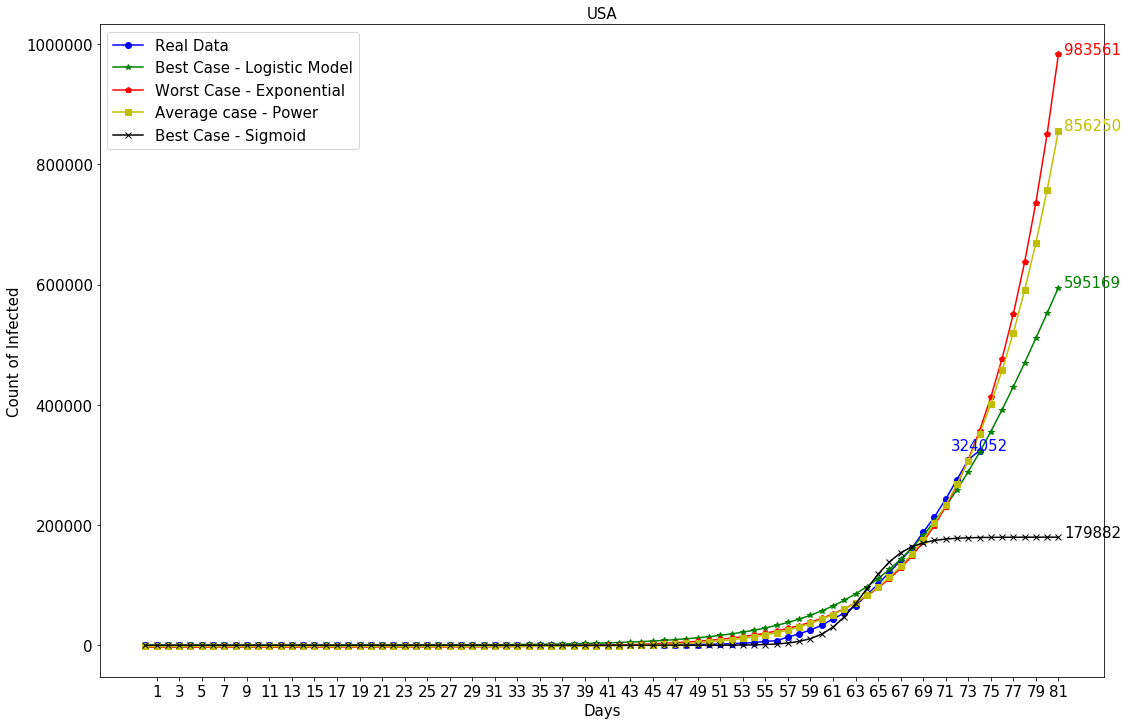

In [56]:
predicted_days = 7
Country_Region = "USA"
COVID_Spread_Prediction(predicted_days, Country_Region)